In [4]:
pip install num2words

     |████████████████████████████████| 102kB 4.6MB/s 


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Sat May  9 22:34:44 2020

# @author: sakib

# """


# #change base directory
# import os

base_path=r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
working_directory = '/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
data_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/data'
embedding_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/embeddings'
models_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/models'
model_directory = working_directory+'/'+'models'


# def change_base_dir(base_dir_path):
#     """ Change the working directopry of the code"""
    
#     if not os.path.exists(base_dir_path):
#         print ('creating directory', base_dir_path)
#         os.makedirs(base_dir_path)
#     print ('Changing base directory to ', base_dir_path)
#     os.chdir(base_dir_path)
 
      

# # base_folder='data'
# # base_dir_path=base_path+'/'+base_folder
# # change_base_dir(base_dir_path)
# # download_data.extract_file('/media/sakib/alpha/work/EmotionDetectionDir/git/data/glove.6B.zip')



# change_base_dir(base_path)
# if not os.path.exists(data_folder):
#         os.makedirs(data_folder)
# if not os.path.exists(embedding_folder):
#         os.makedirs(embedding_folder)
# if not os.path.exists(models_folder):
#         os.makedirs(models_folder)
  
#loading necessary files


In [7]:
import os
base_path=r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/data'
os.chdir(base_path)

In [8]:
#loading twitter dataset
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def load_data(csv_file): 
    dataset = pd.read_csv(csv_file)
    dataset = dataset.rename(columns={'airline_sentiment': 'Label', 'text': 'Text'})
    return dataset[['Text', 'Label']]


df = load_data('Tweets.csv')

os.chdir(r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes')
from load_preprocess import load_data_embedding
from load_preprocess import preprocess_data
from load_preprocess import read_labels
import word2vec
import sswe
import glove_file
import designing_network
import download_data

In [10]:
corpus = []

for i in range (len(df)):
  review = re.sub('[^a-zA-Z@]', ' ', df['Text'][i])

  review = review.lower()
  review = review.split()
  bog = []
  for j in range (len(review)):
    if review[j].startswith('@') == False:
      bog.append(review[j])
  bog = ' '.join(bog) 
  corpus.append(bog)

In [11]:
print(len(corpus))

14640


In [12]:
import numpy as np
label = np.zeros((len(corpus), len(np.unique(df['Label']))))

In [13]:
for i in range (len(df['Label'])):
  if df['Label'][i] == 'positive':
    label[i][0] = 1
  elif df['Label'][i] == 'neutral':
    label[i][1] = 1
  elif df['Label'][i] == 'negative':
    label[i][2] = 1


In [14]:



#importing libraries
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd



# Download data

# print('Checking requirements:')
# download_data.download_data(base_path = base_path)

# #loading data
# print('Step1: Loading Embedding training Dataset...')


# dataset_embedding = load_data_embedding(working_directory+'/data/'+'training.1600000.processed.noemoticon.csv')
# print('Step2: Shuffling data...')
# dataset_embedding = dataset_embedding.sample(frac=1) # reshuffling the data
# print('Step3: Preprocessing the texts...')
# texts = preprocess_data(dataset_embedding)
# labels = read_labels(dataset_embedding)


# # building word2vec model
# print('Step4: Building word2vec model...')
# EMBEDDING_DIM = 100
# w2v = word2vec.create_word2vec(directory = working_directory+'/'+'embeddings',texts = texts ,min_count = 1,EMBEDDING_DIM = EMBEDDING_DIM)



# #building sswe model
# print('Step5: Building sswe model...')
# sswe_model,training_word_index = sswe.sswe_model(texts, labels)
# embedding_weights, word_indices_df, merged = sswe.save_sswe(sswe_model,training_word_index,directory = working_directory+'/'+'embeddings')
# print('Embedding Layers are trained.')


# #loading sentiment treebank dataset
# print ('Step6: loading sentiment treebank dataset...')
# dataset = pd.read_csv(working_directory + '/data/stanford_sentiment_treebank_half_processed_2.csv')
texts = corpus
y = label


#tokenizing
print ('Step7: Tokenizing...')

tokens = []
for line in texts:
    words = word_tokenize(line)
    tokens.append(words)



tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokens)
sequences = tokenizer_obj.texts_to_sequences(tokens)


#padding
print ('Step8: Padding...')
tokenizer_word_index = tokenizer_obj.word_index
max_length = 150
review_pad = pad_sequences(sequences, maxlen = max_length)



# train test split
print('Step9: train and test set generation...')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review_pad, y, test_size = 0.20, random_state = 42)



# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(review_pad, y, test_size = 0.20, random_state = 42)


EMBEDDING_DIM = 100
# word2vec Embedding Matrix
print('Step10: Generating word2vec embedding matrix...')
num_words = len(tokenizer_word_index) + 1
embedding_matrix_w2v = word2vec.load_word2vec(working_directory+'/'+'embeddings'+'/'+'embeddings_w2v.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)


# # training the word2vec model with lstm
# print('Step11: designing lstm+w2v model...')

# w2v_lstm = designing_network.model_architecture_word2vec_lstm(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_lstm, history = designing_network.fit_network(w2v_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_lstm, modelname = 'w2v_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_lstm.json', h5file = 'w2v_lstm.h5')
# # designing_network.analyze_performance(model_name = 'w2v+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# # training the word2vec model with gru
# print('Step12: designing gru+w2v model...')

# w2v_gru = designing_network.model_architecture_word2vec_gru(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_gru, history = designing_network.fit_network(w2v_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_gru, modelname = 'w2v_gru', directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_gru.json', h5file = 'w2v_gru.h5')
# # designing_network.analyze_performance(model_name = 'w2v+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# # training the word2vec model with bidirectional
# print('Step13: designing bidirectional+w2v model...')

# w2v_bidirectional = designing_network.model_architecture_word2vec_bidirectional(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_bidirectional,history = designing_network.fit_network(w2v_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_bidirectional, modelname = 'w2v_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_bidirectional.json', h5file = 'w2v_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'w2v+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# sswe embedding matrix
print('Step14: Generating sswe embedding matrix...')
sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)

    
# # training the sswe model with lstm
# print('Step15: designing lstm+sswe model...')
# sswe_lstm = designing_network.model_architecture_sswe_lstm(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_lstm, history = designing_network.fit_network(sswe_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_lstm, modelname = 'sswe_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

    
# # training the sswe model with gru
# print('Step16: designing gru+sswe model...')
# sswe_gru = designing_network.model_architecture_sswe_gru(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_gru, history = designing_network.fit_network(sswe_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_gru, modelname = 'sswe_gru',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_gru.json', h5file = 'sswe_gru.h5')
# # designing_network.analyze_performance(model_name = 'sswe+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# # training the sswe model with bidirectional
# print('Step17: designing bidirectional+sswe model...')
# sswe_bidirectional = designing_network.model_architecture_sswe_bidirectional(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_bidirectional, history = designing_network.fit_network(sswe_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_bidirectional, modelname = 'sswe_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# glove embedding matrix
print ('Step18: Generating glove embedding matrix...')
embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)



# # training the glove model with lstm
# print('Step19: designing lstm+glove model...')
# glove_lstm = designing_network.model_architecture_glove_lstm(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_lstm, history = designing_network.fit_network(glove_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_lstm, modelname = 'glove_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_lstm.json', h5file = 'glove_lstm.h5')
# # designing_network.analyze_performance(model_name = 'glove+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# # training the glove model with gru
# print('Step20: designing gru+glove model...')
# glove_gru = designing_network.model_architecture_glove_gru(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_gru, history = designing_network.fit_network(glove_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_gru, modelname = 'glove_gru',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_gru.json', h5file = 'glove_gru.h5')
# # designing_network.analyze_performance(model_name = 'glove+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# # training the glove model with bidirectional
# print('Step21: designing bidirectional+glove model...')
# glove_bidirectional = designing_network.model_architecture_glove_bidirectional(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_bidirectional, history = designing_network.fit_network(glove_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_bidirectional, modelname = 'glove_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_bidirectional.json', h5file = 'glove_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'glove+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# # training the parallel network
# print ('Step22: Training parallel network...')
# embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
# print('glove matrix created')
# sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
# embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)
# print('sswe matrix created')
# model = designing_network.parallel_network(embedding_matrix_L = embedding_matrix_glove,
#                                            embedding_matrix_R = embedding_matrix_sswe, 
#                                            num_words = num_words,
#                                            EMBEDDING_DIM_L = 100,
#                                            EMBEDDING_DIM_R = 50,
#                                            max_length = max_length)
# print ('model generated')
# optimizer = Adam(lr = 0.00006)
# model.compile(loss="binary_crossentropy",optimizer=optimizer)
# model.summary()

# lstm_glove_lstm_sswe, history = designing_network.fit_network_parallel(model = model, 
#                                                               X_train = X_train, 
#                                                               X_test = X_test, 
#                                                               y_train = y_train, 
#                                                               y_test = y_test,
#                                                               batch_size = 512)




# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# designing_network.save_network_model(lstm_glove_lstm_sswe, modelname = 'lstm_glove_lstm_sswe',directory = model_directory)
# #loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'lstm_glove_lstm_sswe.json', h5file = 'lstm_glove_lstm_sswe.h5')
# #designing_network.analyze_performance_parallel(model_name = 'lstm_glove_lstm_sswe', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# designing_network.generate_full_report(working_directory, X_test, y_test)


Step7: Tokenizing...
Step8: Padding...
Step9: train and test set generation...
Step10: Generating word2vec embedding matrix...
Step14: Generating sswe embedding matrix...
Step18: Generating glove embedding matrix...


In [ ]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Sat May  9 22:34:44 2020

# @author: sakib

# """


# #change base directory
# import os

base_path=r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
working_directory = '/content/drive/My Drive/Sentiment_analysis_NLP/All_codes'
data_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/data'
embedding_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/embeddings'
models_folder = r'/content/drive/My Drive/Sentiment_analysis_NLP/All_codes/models'
model_directory = working_directory+'/'+'models'


# def change_base_dir(base_dir_path):
#     """ Change the working directopry of the code"""
    
#     if not os.path.exists(base_dir_path):
#         print ('creating directory', base_dir_path)
#         os.makedirs(base_dir_path)
#     print ('Changing base directory to ', base_dir_path)
#     os.chdir(base_dir_path)
 
      

# # base_folder='data'
# # base_dir_path=base_path+'/'+base_folder
# # change_base_dir(base_dir_path)
# # download_data.extract_file('/media/sakib/alpha/work/EmotionDetectionDir/git/data/glove.6B.zip')



# change_base_dir(base_path)
# if not os.path.exists(data_folder):
#         os.makedirs(data_folder)
# if not os.path.exists(embedding_folder):
#         os.makedirs(embedding_folder)
# if not os.path.exists(models_folder):
#         os.makedirs(models_folder)
  
#loading necessary files


In [ ]:



#importing libraries
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd



# Download data

# print('Checking requirements:')
# download_data.download_data(base_path = base_path)

# #loading data
# print('Step1: Loading Embedding training Dataset...')


# dataset_embedding = load_data_embedding(working_directory+'/data/'+'training.1600000.processed.noemoticon.csv')
# print('Step2: Shuffling data...')
# dataset_embedding = dataset_embedding.sample(frac=1) # reshuffling the data
# print('Step3: Preprocessing the texts...')
# texts = preprocess_data(dataset_embedding)
# labels = read_labels(dataset_embedding)


# # building word2vec model
# print('Step4: Building word2vec model...')
# EMBEDDING_DIM = 100
# w2v = word2vec.create_word2vec(directory = working_directory+'/'+'embeddings',texts = texts ,min_count = 1,EMBEDDING_DIM = EMBEDDING_DIM)



# #building sswe model
# print('Step5: Building sswe model...')
# sswe_model,training_word_index = sswe.sswe_model(texts, labels)
# embedding_weights, word_indices_df, merged = sswe.save_sswe(sswe_model,training_word_index,directory = working_directory+'/'+'embeddings')
# print('Embedding Layers are trained.')


# #loading sentiment treebank dataset
# print ('Step6: loading sentiment treebank dataset...')
# dataset = pd.read_csv(working_directory + '/data/stanford_sentiment_treebank_half_processed_2.csv')
texts = corpus
y = label


#tokenizing
print ('Step7: Tokenizing...')

tokens = []
for line in texts:
    words = word_tokenize(line)
    tokens.append(words)



tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokens)
sequences = tokenizer_obj.texts_to_sequences(tokens)


#padding
print ('Step8: Padding...')
tokenizer_word_index = tokenizer_obj.word_index
max_length = 150
review_pad = pad_sequences(sequences, maxlen = max_length)



# train test split
print('Step9: train and test set generation...')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review_pad, y, test_size = 0.20, random_state = 42)



# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(review_pad, y, test_size = 0.20, random_state = 42)


EMBEDDING_DIM = 100
# word2vec Embedding Matrix
print('Step10: Generating word2vec embedding matrix...')
num_words = len(tokenizer_word_index) + 1
embedding_matrix_w2v = word2vec.load_word2vec(working_directory+'/'+'embeddings'+'/'+'embeddings_w2v.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)


# # training the word2vec model with lstm
# print('Step11: designing lstm+w2v model...')

# w2v_lstm = designing_network.model_architecture_word2vec_lstm(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_lstm, history = designing_network.fit_network(w2v_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_lstm, modelname = 'w2v_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_lstm.json', h5file = 'w2v_lstm.h5')
# # designing_network.analyze_performance(model_name = 'w2v+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# # training the word2vec model with gru
# print('Step12: designing gru+w2v model...')

# w2v_gru = designing_network.model_architecture_word2vec_gru(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_gru, history = designing_network.fit_network(w2v_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_gru, modelname = 'w2v_gru', directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_gru.json', h5file = 'w2v_gru.h5')
# # designing_network.analyze_performance(model_name = 'w2v+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# # training the word2vec model with bidirectional
# print('Step13: designing bidirectional+w2v model...')

# w2v_bidirectional = designing_network.model_architecture_word2vec_bidirectional(embedding_matrix_w2v, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# w2v_bidirectional,history = designing_network.fit_network(w2v_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(w2v_bidirectional, modelname = 'w2v_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'w2v_bidirectional.json', h5file = 'w2v_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'w2v+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# sswe embedding matrix
print('Step14: Generating sswe embedding matrix...')
sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)

    
# # training the sswe model with lstm
# print('Step15: designing lstm+sswe model...')
# sswe_lstm = designing_network.model_architecture_sswe_lstm(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_lstm, history = designing_network.fit_network(sswe_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_lstm, modelname = 'sswe_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

    
# # training the sswe model with gru
# print('Step16: designing gru+sswe model...')
# sswe_gru = designing_network.model_architecture_sswe_gru(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_gru, history = designing_network.fit_network(sswe_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_gru, modelname = 'sswe_gru',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_gru.json', h5file = 'sswe_gru.h5')
# # designing_network.analyze_performance(model_name = 'sswe+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# # training the sswe model with bidirectional
# print('Step17: designing bidirectional+sswe model...')
# sswe_bidirectional = designing_network.model_architecture_sswe_bidirectional(embedding_matrix_sswe, num_words,EMBEDDING_DIM = 50 , max_length = max_length)
# sswe_bidirectional, history = designing_network.fit_network(sswe_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(sswe_bidirectional, modelname = 'sswe_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'sswe_bidirectional.json', h5file = 'sswe_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'sswe+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# glove embedding matrix
print ('Step18: Generating glove embedding matrix...')
embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=EMBEDDING_DIM)



# # training the glove model with lstm
# print('Step19: designing lstm+glove model...')
# glove_lstm = designing_network.model_architecture_glove_lstm(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_lstm, history = designing_network.fit_network(glove_lstm, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_lstm, modelname = 'glove_lstm',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_lstm.json', h5file = 'glove_lstm.h5')
# # designing_network.analyze_performance(model_name = 'glove+lstm', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


# # training the glove model with gru
# print('Step20: designing gru+glove model...')
# glove_gru = designing_network.model_architecture_glove_gru(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_gru, history = designing_network.fit_network(glove_gru, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_gru, modelname = 'glove_gru',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_gru.json', h5file = 'glove_gru.h5')
# # designing_network.analyze_performance(model_name = 'glove+gru', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# # training the glove model with bidirectional
# print('Step21: designing bidirectional+glove model...')
# glove_bidirectional = designing_network.model_architecture_glove_bidirectional(embedding_matrix_glove, num_words,EMBEDDING_DIM = EMBEDDING_DIM , max_length = max_length)
# glove_bidirectional, history = designing_network.fit_network(glove_bidirectional, X_train, X_test, y_train, y_test,batch_size = 512)
# designing_network.save_network_model(glove_bidirectional, modelname = 'glove_bidirectional',directory = model_directory)
# # loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'glove_bidirectional.json', h5file = 'glove_bidirectional.h5')
# # designing_network.analyze_performance(model_name = 'glove+bidirectional', loaded_model = loaded_model,X_test = X_test,y_test = y_test)




# # training the parallel network
# print ('Step22: Training parallel network...')
# embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
# print('glove matrix created')
# sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
# embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)
# print('sswe matrix created')
# model = designing_network.parallel_network(embedding_matrix_L = embedding_matrix_glove,
#                                            embedding_matrix_R = embedding_matrix_sswe, 
#                                            num_words = num_words,
#                                            EMBEDDING_DIM_L = 100,
#                                            EMBEDDING_DIM_R = 50,
#                                            max_length = max_length)
# print ('model generated')
# optimizer = Adam(lr = 0.00006)
# model.compile(loss="binary_crossentropy",optimizer=optimizer)
# model.summary()

# lstm_glove_lstm_sswe, history = designing_network.fit_network_parallel(model = model, 
#                                                               X_train = X_train, 
#                                                               X_test = X_test, 
#                                                               y_train = y_train, 
#                                                               y_test = y_test,
#                                                               batch_size = 512)




# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# designing_network.save_network_model(lstm_glove_lstm_sswe, modelname = 'lstm_glove_lstm_sswe',directory = model_directory)
# #loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'lstm_glove_lstm_sswe.json', h5file = 'lstm_glove_lstm_sswe.h5')
# #designing_network.analyze_performance_parallel(model_name = 'lstm_glove_lstm_sswe', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

# designing_network.generate_full_report(working_directory, X_test, y_test)


Step7: Tokenizing...
Step8: Padding...
Step9: train and test set generation...
Step10: Generating word2vec embedding matrix...
Step14: Generating sswe embedding matrix...
Step18: Generating glove embedding matrix...


In [27]:
    
def SE_block(input_x):
  xin = GlobalMaxPooling1D()(input_x)
  a = input_x.shape[-1]
  xin = Dense(int(a/2), activation = 'relu')(xin)
  xin = Dense(a , activation = 'relu')(xin)
  xin = Multiply()([xin , input_x])
  return xin



def attention(input_x):
  xin = SE_block(input_x)
  a = input_x.shape[-1]
  xin = Conv1D(filters = a/2, kernel_size = 2, strides = 1, padding = 'same')(xin)
  xin = Conv1D(filters = a, kernel_size = 2, strides = 1, padding = 'same')(xin)
  xin = Multiply()([input_x, xin])
  return xin


def method_final(embedding_matrix_L,embedding_matrix_R,embedding_matrix_M,num_words,EMBEDDING_DIM_L = 100, EMBEDDING_DIM_R= 50, EMBEDDING_DIM_M= 100,max_length = 150):
  x_input = Input((150,))
  embedding_layer_L = Embedding(num_words,
                                EMBEDDING_DIM_L,
                                embeddings_initializer = Constant(embedding_matrix_L),
                                #input_length = max_length,
                                trainable = False)(x_input)

  embedding_layer_R = Embedding(num_words,
                              EMBEDDING_DIM_R,
                              embeddings_initializer = Constant(embedding_matrix_R),
                              #input_length = max_length,
                              trainable = False)(x_input)

  embedding_layer_M = Embedding(num_words,
                              EMBEDDING_DIM_M,
                              embeddings_initializer = Constant(embedding_matrix_M),
                              #input_length = max_length,
                              trainable = False)(x_input)




  xL = Bidirectional(LSTM(64 , return_sequences=True,  dropout=0.3, recurrent_dropout=0.2))(embedding_layer_L)
  xR = Bidirectional(LSTM(64 , return_sequences=True,  dropout=0.3, recurrent_dropout=0.2))(embedding_layer_R)
  xM = Bidirectional(LSTM(64 , return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(embedding_layer_M)
  print(xL.shape)
  print(xR.shape)
  print(xM.shape)

  xL = attention(xL)
  xR = attention(xR)
  xM = attention(xM)

  final1 = Concatenate()([xL,xR,xM])
  # final1 = attention(final1)
  final1 = Flatten()(final1)
  # final1 = Dense(512, activation = 'relu')(final1)
  final1 = Dense (256, activation = 'relu')(final1)
  final1 = Dense(128, activation = 'relu')(final1)
  final1 = Dense(3, activation = 'sigmoid')(final1)
  model = Model(inputs = x_input, outputs = final1)
  return model

In [ ]:
# inp = Input((256,256))
# out = attention()(inp)
# demo = Model (inp,out)
# demo.summary()

In [ ]:
# def method_final2(embedding_matrix_L,embedding_matrix_R,embedding_matrix_M,num_words,EMBEDDING_DIM_L = 100, EMBEDDING_DIM_R= 50, EMBEDDING_DIM_M= 100,max_length = 150):
#   x_input = Input((150,))
#   embedding_layer_L = Embedding(num_words,
#                                 EMBEDDING_DIM_L,
#                                 embeddings_initializer = Constant(embedding_matrix_L),
#                                 #input_length = max_length,
#                                 trainable = False)(x_input)

#   embedding_layer_R = Embedding(num_words,
#                               EMBEDDING_DIM_R,
#                               embeddings_initializer = Constant(embedding_matrix_R),
#                               #input_length = max_length,
#                               trainable = False)(x_input)

#   embedding_layer_M = Embedding(num_words,
#                               EMBEDDING_DIM_M,
#                               embeddings_initializer = Constant(embedding_matrix_M),
#                               #input_length = max_length,
#                               trainable = False)(x_input)


#   xL = attention()(embedding_layer_L)
#   xR = attention()(embedding_layer_R)
#   xM = attention()(embedding_layer_M)
#   # final1 = Concatenate()([xL,xR,xM])

#   # final1 = Bidirectional(LSTM(64 ,  dropout=0.3, recurrent_dropout=0.2))(final1)
#   x1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_L)
#   x2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_R)
#   x3 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_M)

#   final2 = Concatenate()([x1,x2,x3])
#   final2 = Dense(256, activation = 'relu')(final2)
#   # final1 = Concatenate()([final1,final2])
#   xL = Dense(64, activation = 'relu')(xL)
#   xR = Dense(64, activation = 'relu')(xR)
#   xM = Dense(64, activation = 'relu')(xM)
#   # print(embedding_layer_L.shape)
#   # print(embedding_layer_R.shape)
#   # print(embedding_layer_M.shape)

#   final1 = Concatenate()([xL,xR,xM])
#   print(final1.shape)
#   # final1 = Flatten()(final1)
#   #final1 = Dense(512, activation = 'relu')(final1)
#   final1 = Dense (256, activation = 'relu')(final1)
#   final2 = Flatten()(final2)
#   print(final2.shape)
#   final1 = Concatenate()([final1, final2])

#   final1 = Dense (128, activation = 'relu')(final1)
#   final1 = Dense(3, activation = 'softmax')(final1)
#   model = Model(inputs = x_input, outputs = final1)
#   return model

In [ ]:
def method_final1(embedding_matrix_L,embedding_matrix_R,embedding_matrix_M,num_words,EMBEDDING_DIM_L = 100, EMBEDDING_DIM_R= 50, EMBEDDING_DIM_M= 100,max_length = 150):
  x_input = Input((150,))
  embedding_layer_L = Embedding(num_words,
                                EMBEDDING_DIM_L,
                                embeddings_initializer = Constant(embedding_matrix_L),
                                #input_length = max_length,
                                trainable = False)(x_input)

  embedding_layer_R = Embedding(num_words,
                              EMBEDDING_DIM_R,
                              embeddings_initializer = Constant(embedding_matrix_R),
                              #input_length = max_length,
                              trainable = False)(x_input)

  embedding_layer_M = Embedding(num_words,
                              EMBEDDING_DIM_M,
                              embeddings_initializer = Constant(embedding_matrix_M),
                              #input_length = max_length,
                              trainable = False)(x_input)


  xL = attention(embedding_layer_L)
  xR = attention(embedding_layer_R)
  xM = attention(embedding_layer_M)
  # final1 = Concatenate()([xL,xR,xM])

  # final1 = Bidirectional(LSTM(64 ,  dropout=0.3, recurrent_dropout=0.2))(final1)
  x1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_L)
  x2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_R)
  x3 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_M)
  final2 = Concatenate()([x1,x2,x3])
  final2 = Dense(256, activation = 'relu')(final2)
  # final1 = Concatenate()([final1,final2])
  xL = Dense(64, activation = 'relu')(xL)
  xR = Dense(64, activation = 'relu')(xR)
  xM = Dense(64, activation = 'relu')(xM)
  # print(embedding_layer_L.shape)
  # print(embedding_layer_R.shape)
  # print(embedding_layer_M.shape)

  final1 = Concatenate()([xL,xR,xM])
  print(final1.shape)
  # final1 = Flatten()(final1)
  #final1 = Dense(512, activation = 'relu')(final1)
  final1 = Dense (256, activation = 'relu')(final1)
  final1 = Concatenate()([final1, final2])
  final1 = Flatten()(final1)
  final1 = Dense (128, activation = 'relu')(final1)
  final1 = Dense(3, activation = 'softmax')(final1)
  model = Model(inputs = x_input, outputs = final1)
  return model

In [ ]:

# from keras import Model
# x_input = Input((150,))
# out = Embedding(num_words,
#                 50,
#                 embeddings_initializer = Constant(embedding_matrix_sswe),
#                 #input_length = max_length,
#                 trainable = False)(x_input)
# model = Model(x_input, out)
# model.summary()

In [ ]:
# def method_final3(embedding_matrix_L,embedding_matrix_R,embedding_matrix_M,num_words,EMBEDDING_DIM_L = 100, EMBEDDING_DIM_R= 50, EMBEDDING_DIM_M= 100,max_length = 150):
#   x_input = Input((150,))
#   embedding_layer_L = Embedding(num_words,
#                                 EMBEDDING_DIM_L,
#                                 embeddings_initializer = Constant(embedding_matrix_L),
#                                 #input_length = max_length,
#                                 trainable = False)(x_input)

#   embedding_layer_R = Embedding(num_words,
#                               EMBEDDING_DIM_R,
#                               embeddings_initializer = Constant(embedding_matrix_R),
#                               #input_length = max_length,
#                               trainable = False)(x_input)

#   embedding_layer_M = Embedding(num_words,
#                               EMBEDDING_DIM_M,
#                               embeddings_initializer = Constant(embedding_matrix_M),
#                               #input_length = max_length,
#                               trainable = False)(x_input)


#   xL = attention()(embedding_layer_L)
#   xR = attention()(embedding_layer_R)
#   xM = attention()(embedding_layer_M)
#   # final1 = Concatenate()([xL,xR,xM])

#   # final1 = Bidirectional(LSTM(64 ,  dropout=0.3, recurrent_dropout=0.2))(final1)
#   x1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_L)
#   x2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_R)
#   x3 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.3, recurrent_dropout = 0.2))(embedding_layer_M)
#   x1 = attention()(x1)
#   x2 = attention()(x2)
#   x3 = attention()(x3)
#   final2 = Concatenate()([x1,x2,x3])
#   # final2 = Dense(256, activation = 'relu')(final2)
#   # final1 = Concatenate()([final1,final2])
#   # xL = Dense(64, activation = 'relu')(xL)
#   # xR = Dense(64, activation = 'relu')(xR)
#   # xM = Dense(64, activation = 'relu')(xM)
#   # print(embedding_layer_L.shape)
#   # print(embedding_layer_R.shape)
#   # print(embedding_layer_M.shape)

#   final1 = Concatenate()([xL,xR,xM])
#   print(final1.shape)
#   # final1 = Flatten()(final1)
#   #final1 = Dense(512, activation = 'relu')(final1)
#   # final1 = Dense (256, activation = 'relu')(final1)
#   # final2 = Flatten()(final2)
#   print(final2.shape)
#   final1 = Concatenate()([final1, final2])

#   final1 = Dense (128, activation = 'relu')(final1)
#   final1 = Dense(3, activation = 'softmax')(final1)
#   model = Model(inputs = x_input, outputs = final1)
#   return model

In [ ]:
# inp = Input((150,))
# embedding_layer_L = Embedding(num_words,
#                               100,
#                               embeddings_initializer = Constant(embedding_matrix_glove),
#                               #input_length = max_length,
#                               trainable = False)(inp)

# out1 = Bidirectional(LSTM(512, return_sequences=True))(embedding_layer_L)
# out = LSTM(256,return_sequences = True)(out1)
# out = LSTM(128, return_sequences=True)(out)
# at = attention()(out)
# out = Multiply()([at,out])
# out = Concatenate()([out1,out, embedding_layer_L])


# outA = Bidirectional(LSTM(128, return_sequences=True))(out)
# out = LSTM(64,return_sequences = True)(outA)
# out = LSTM(32, return_sequences=True)(out)
# at = attention()(out)
# out = Multiply()([at,out])
# out = Concatenate()([out1,out,outA,embedding_layer_L])

# outB = Bidirectional(LSTM(32, return_sequences=True))(out)
# out = LSTM(16,return_sequences = True)(outB)
# out = LSTM(8, return_sequences=True)(out)
# at = attention()(out)
# out = Multiply()([at,out])
# out = Concatenate()([outB,out,outA,out1,embedding_layer_L])

# outC = Bidirectional(LSTM(8, return_sequences=True))(out)
# out = LSTM(4,return_sequences = True)(outC)
# out = LSTM(2, return_sequences=True)(out)
# at = attention()(out)
# out = Multiply()([at,out])
# out = Concatenate()([outC, outB,out,outA,out1,embedding_layer_L])


# out = attention()(out)
# # out = Multiply()([at,out])
# # out = Flatten()(out)



# out = Dense(64, activation = 'relu')(out)
# out = Dense(3, activation = 'softmax')(out)
# model_demo = Model(inp, out)

In [17]:
from keras.layers import *
from keras.initializers import *
from keras import Model

In [28]:
model3 = method_final( embedding_matrix_L= embedding_matrix_glove,
                      embedding_matrix_R = embedding_matrix_sswe,
                      embedding_matrix_M = embedding_matrix_w2v,
                      num_words = num_words,
                      max_length = 150)
model3.summary()

(None, 150, 128)
(None, 150, 128)
(None, 150, 128)
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 150, 100)     1292900     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 150, 50)      646450      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 150, 100)     1292900     input_3[0][0]                    
____________________________________

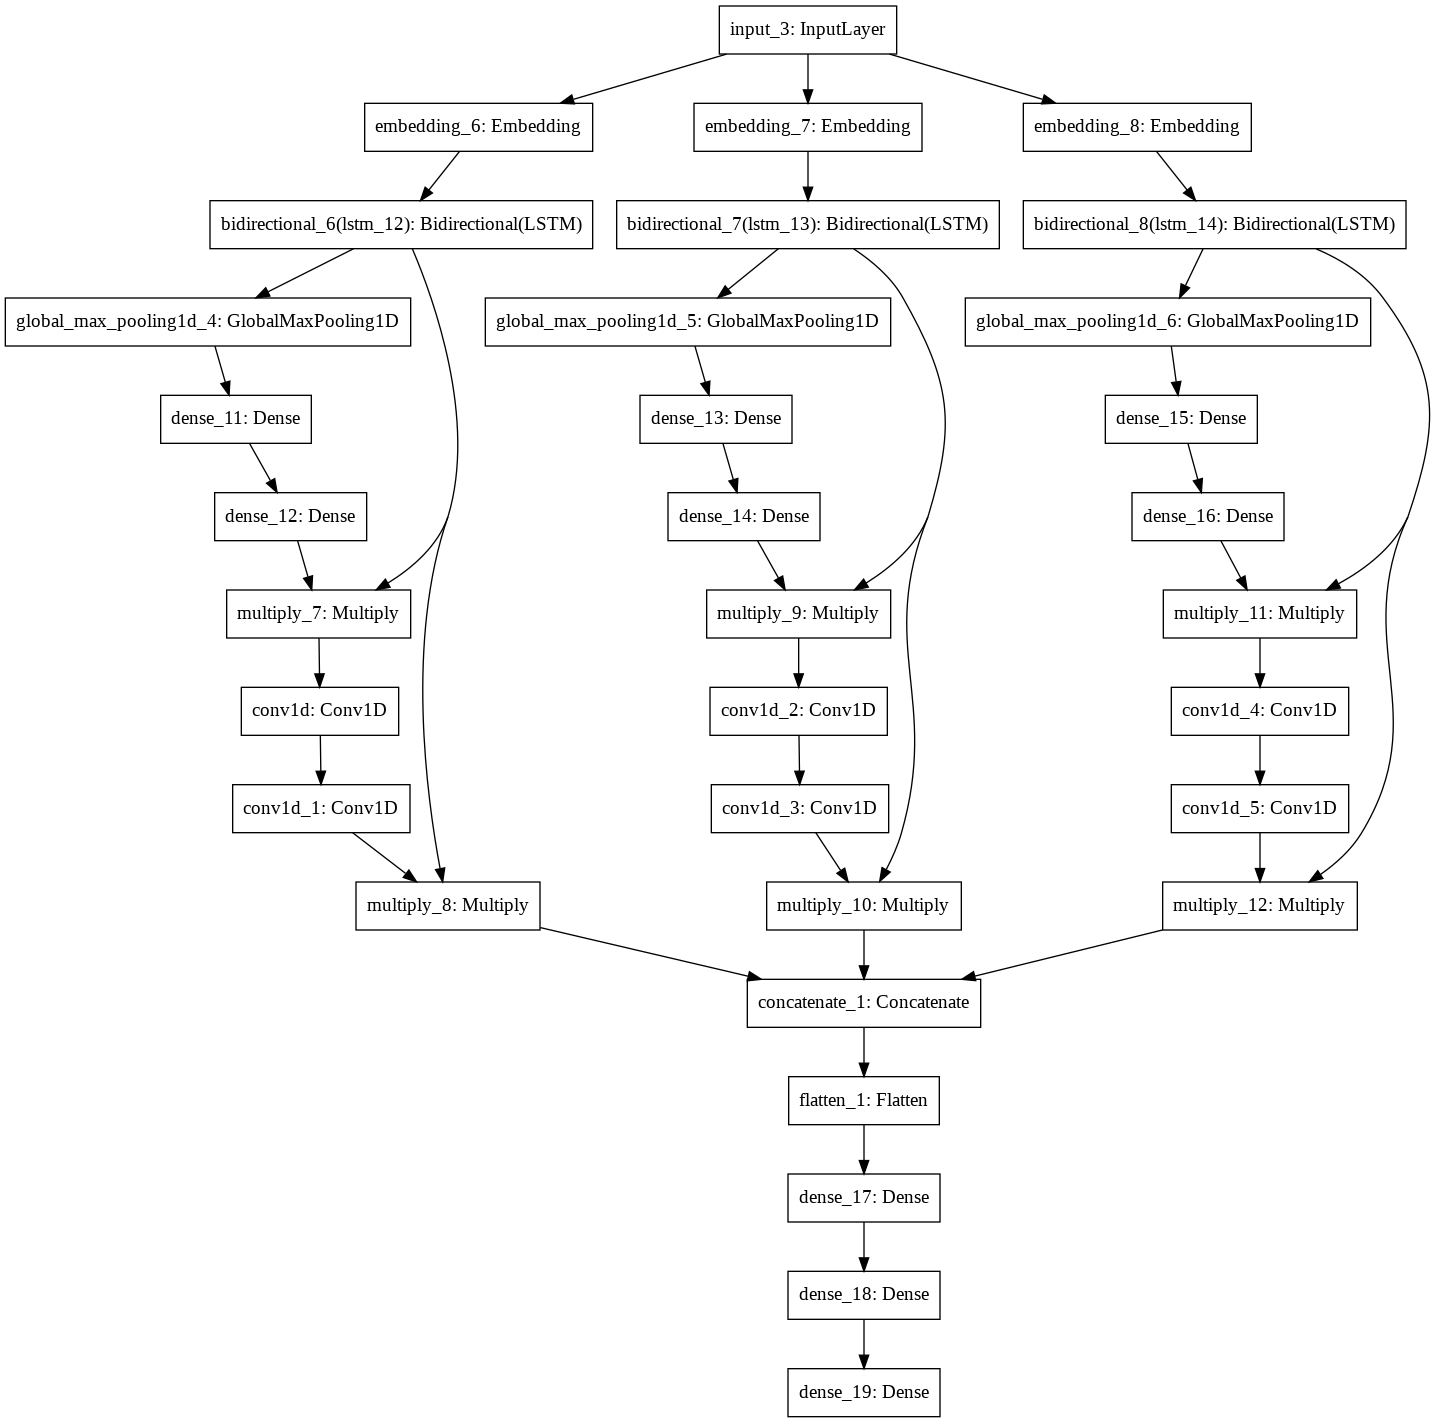

In [29]:
from keras.utils import plot_model
plot_model(model3)

In [32]:
# from keras import *
# # model = designing_network.method_final(Input(150), embedding_matrix_L= embedding_matrix_glove,
# #                                        embedding_matrix_R = embedding_matrix_sswe,
# #                                        embedding_matrix_M = embedding_matrix_w2v,
# #                                        max_length = 150)
from keras.optimizers import *
# import keras
# mse = keras.losses.MeanSquaredError()
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import *
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model3.fit(X_train, y_train,
                    batch_size = 32,
                    verbose = 1, 
                    epochs = 20,
                    validation_data = (X_test,y_test),
                    callbacks = [reduce_lr])

Epoch 1/20
366/366 [==============================] - 588s 2s/step - loss: 6.0870 - accuracy: 0.6224 - val_loss: 5.7195 - val_accuracy: 0.6452
Epoch 2/20
366/366 [==============================] - 587s 2s/step - loss: 6.0869 - accuracy: 0.6224 - val_loss: 5.7195 - val_accuracy: 0.6452
Epoch 3/20
366/366 [==============================] - ETA: 0s - loss: 6.0870 - accuracy: 0.6224

In [ ]:
# import designing_network
# # training updated network
# print ('Step23: Training updated parallel network...')
# print('Generating word2vec embedding matrix...')
# num_words = len(tokenizer_word_index) + 1
# embedding_matrix_w2v = word2vec.load_word2vec(working_directory+'/'+'embeddings'+'/'+'embeddings_w2v.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
# embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
# print('glove matrix created')
# sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
# embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)
# print('sswe matrix created')


In [ ]:

# import keras
# from keras.models import Sequential
# from keras.layers import Dense,Embedding,LSTM,GRU,Bidirectional,Conv1D,GlobalMaxPooling1D,BatchNormalization, Flatten,Dropout
# from keras.initializers import Constant
# from keras.models import model_from_json
# from keras.layers import Input
# from keras.layers import LeakyReLU
# from keras import Model
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# import csv
# def UPDATED_PARALLEL(embedding_matrix_L,embedding_matrix_R,embedding_matrix_M,num_words,EMBEDDING_DIM_L = 100, EMBEDDING_DIM_R= 50, EMBEDDING_DIM_M= 50,max_length = 150):
#     left_input = Input((max_length,))
#     right_input = Input((max_length,))
#     middle_input = Input((max_length,))
    
    
#     #left network
#     model_L = Sequential()
#     embedding_layer_L = Embedding(num_words,
#                                 EMBEDDING_DIM_L,
#                                 embeddings_initializer = Constant(embedding_matrix_L),
#                                 input_length = max_length,
#                                 trainable = False)
    
    
#     model_L.add (embedding_layer_L)
#     model_L.add(Bidirectional(LSTM(64,  dropout=0.3, recurrent_dropout=0.2)))
    
    
    
    
#     #right network
#     model_R = Sequential()
#     embedding_layer_R = Embedding(num_words,
#                                 EMBEDDING_DIM_R,
#                                 embeddings_initializer = Constant(embedding_matrix_R),
#                                 input_length = max_length,
#                                 trainable = False)
    
    
#     model_R.add (embedding_layer_R)
#     model_R.add(Bidirectional(LSTM(64,  dropout=0.3, recurrent_dropout=0.2)))
    
#     #middle network
    
#     model_M = Sequential()
#     embedding_layer_M = Embedding(num_words,
#                                 EMBEDDING_DIM_M,
#                                 embeddings_initializer = Constant(embedding_matrix_L),
#                                 input_length = max_length,
#                                 trainable = False)
    
    
#     model_M.add (embedding_layer_M)
#     model_M.add(Bidirectional(LSTM(64,  dropout=0.3, recurrent_dropout=0.2)))

    
#     # Generate the encodings (feature vectors) for the two images
#     encoded_l = model_L(left_input)
#     encoded_r = model_R(right_input)
#     encoded_m = model_M(middle_input)
    
#     # Add a customized layer to concatenate the encodings
#     merged_net = keras.layers.Concatenate()([encoded_l,encoded_r,encoded_m])
        
#     out_1 = LeakyReLU()(merged_net)
#     out_2 = Dense(64,activation='relu')(out_1)
#     out = Dense(3,activation='sigmoid')(out_2)
#     net = Model(inputs = [left_input,right_input,middle_input],outputs = out)
#     return net
    

# model = UPDATED_PARALLEL(embedding_matrix_L = embedding_matrix_glove,
#                                            embedding_matrix_R = embedding_matrix_sswe,
#                                            embedding_matrix_M = embedding_matrix_w2v,
#                                            num_words = num_words,
#                                            EMBEDDING_DIM_L = 100,
#                                            EMBEDDING_DIM_R = 50,
#                                            EMBEDDING_DIM_M = 100,
#                                            max_length = max_length)
# print ('model generated')
# optimizer = Adam(lr = 0.006)
# model.compile(loss="binary_crossentropy",optimizer=optimizer)
# model.summary()
# def fit_network_parallel_3(model, X_train, X_test, y_train, y_test,batch_size = 32, epochs = 10 ,verbose = 1):
#     history = model.fit([X_train,X_train,X_train],y_train, validation_data = ([X_test,X_test,X_test],y_test),batch_size = batch_size, epochs = epochs ,verbose = verbose)
#     return model, history


# updated_parallel, history = fit_network_parallel_3(model = model, 
#                                                               X_train = X_train, 
#                                                               X_test = X_test, 
#                                                               y_train = y_train, 
#                                                               y_test = y_test,
#                                                               batch_size = 128,
#                                                               epochs = 5)


# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# def analyze_performance_parallel_updated(model_name,loaded_model,X_test, y_test):
    
#     # evaluate loaded model on test data
#     loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     score = loaded_model.evaluate([X_test,X_test,X_test], y_test, verbose=1)
#     print ('accuracy: ', score[1]*100)
#     y_pred = loaded_model.predict([X_test,X_test,X_test])
#     y_pred= y_pred>0.5
    
#     neg_pre = precision_score(y_test[:,0], y_pred[:,0])
#     neu_pre = precision_score(y_test[:,1], y_pred[:,1])
#     pos_pre = precision_score(y_test[:,2], y_pred[:,2])
    
#     neg_rec = recall_score(y_test[:,0], y_pred[:,0])
#     neu_rec = recall_score(y_test[:,1], y_pred[:,1]) 
#     pos_rec = recall_score(y_test[:,2], y_pred[:,2])
    
#     neg_f1 = f1_score(y_test[:,0], y_pred[:,0])
#     neu_f1 = f1_score(y_test[:,1], y_pred[:,1])
#     pos_f1 = f1_score(y_test[:,2], y_pred[:,2])
    
#     with open('report1.csv', 'a+', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow([model_name, score[1]*100, neg_f1, neg_pre, neg_rec, neu_f1, neu_pre,neu_rec,pos_f1,pos_pre,pos_rec])

        
#     print('negative precision: ', neg_pre )
#     print('neutral precision: ',  neu_pre)
#     print('positive precision: ', pos_pre)
    
#     print('negative recall: ', neg_rec)
#     print('neutral recall: ', neu_rec)
#     print('positive recall: ', pos_rec)
    
#     print('negative f1_score: ', neg_f1 )
#     print('neutral f1_score: ',  neu_f1)
#     print('positive f1_score: ', pos_f1)

# designing_network.save_network_model(updated_parallel, modelname = 'updated_parallel',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'updated_parallel.json', h5file = 'updated_parallel.h5')
# analyze_performance_parallel_updated(model_name = 'updated_parallel', loaded_model = loaded_model,X_test = X_test,y_test = y_test)

In [ ]:
# print ('Step24: Training parallel network...')
# embedding_matrix_glove = glove_file.load_glove(working_directory+'/'+'data'+'/'+'glove.6B.100d.txt', tokenizer_word_index=tokenizer_word_index, EMBEDDING_DIM=100)
# print('glove matrix created')
# sswe_embedding_filename = working_directory+'/'+'embeddings'+'/'+'embeddings_sswe.tsv'
# embedding_matrix_sswe = sswe.load_sswe(filename = sswe_embedding_filename, tokenizer_word_index = tokenizer_word_index, EMBEDDING_DIM = 50)
# print('sswe matrix created')
# model = designing_network.UPDATED_PARALLEL_2(embedding_matrix_L = embedding_matrix_glove,
#                                            embedding_matrix_R = embedding_matrix_sswe, 
#                                            num_words = num_words,
#                                            EMBEDDING_DIM_L = 100,
#                                            EMBEDDING_DIM_R = 50,
#                                            max_length = max_length)
# print ('model generated')
# optimizer = Adam(lr = 0.006)
# model.compile(loss="binary_crossentropy",optimizer=optimizer)
# model.summary()

# updated_parallel_2, history = designing_network.fit_network_parallel(model = model, 
#                                                               X_train = X_train, 
#                                                               X_test = X_test, 
#                                                               y_train = y_train, 
#                                                               y_test = y_test,
#                                                               batch_size = 512)




# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# designing_network.save_network_model(updated_parallel_2, modelname = 'updated_parallel_2',directory = model_directory)
# loaded_model = designing_network.load_network_model( directory = working_directory+'/'+'models', jsonfile = 'updated_parallel_2.json', h5file = 'updated_parallel_2.h5')
# designing_network.analyze_performance_parallel(model_name = 'updated_parallel_2', loaded_model = loaded_model,X_test = X_test,y_test = y_test)


92/92 [==============================] - 45s 487ms/step - loss: 0.2280 - accuracy: 0.9522


NameError: ignored